Steps:
 - get Data 
 - general info about the dataset
 - description of the data
 - Histogram of the data
 - Split training test validation with hash and seed, stratified  
 - corr of the data to target 
 - zoom in some imp var from above to view details
 - split the data: training, testing  
 - 
    

In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  

In [22]:
def load_housing_data (housing_path):
    
    csv_path = os.path.join(housing_path,"housing.csv")
    data = pd.read_csv(csv_path)
    return data

In [23]:
HOUSING_PATH = "Datasets/housing"
housing = load_housing_data (housing_path = HOUSING_PATH)

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


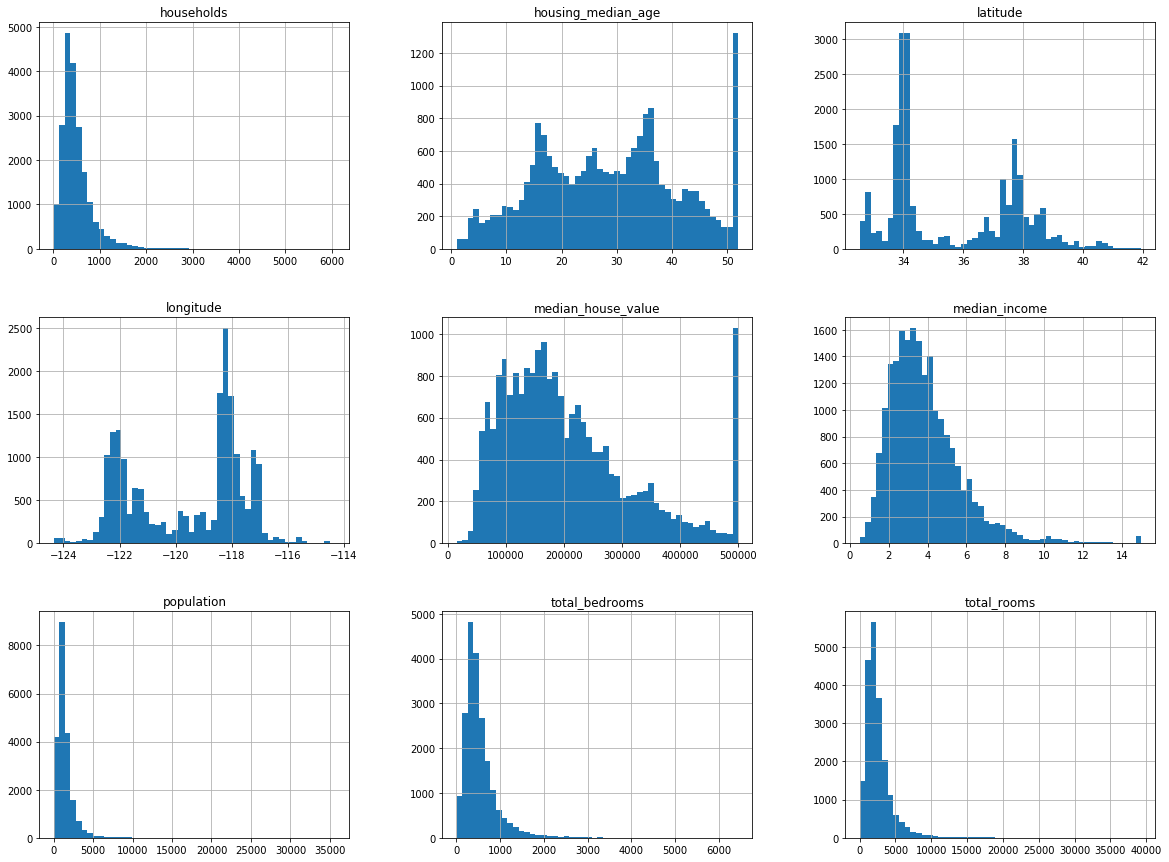

In [27]:
%matplotlib inline
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [28]:
def split_train_test(data, test_ratio):
    train_set, test_set = train_test_split(data, test_size = test_ratio, random_state = 42)
    return train_set, test_set

In [29]:
train_set, test_set = split_train_test(data = housing, test_ratio = 0.2)

In [34]:
# To make sure we dont have selection bias in our training and test set
# let's check distribution on important vari in training and test set 
# To check important vari , checking correlation to the target 

corr_mat = housing.corr()
corr_mat['median_house_value']


longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

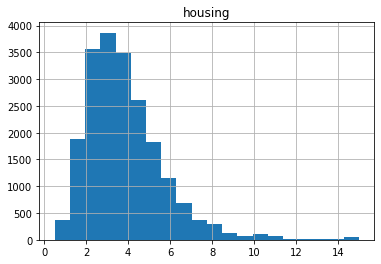

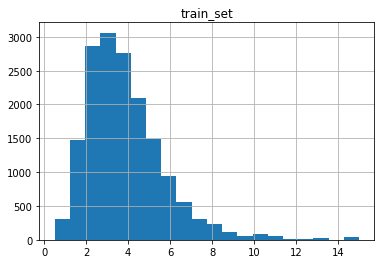

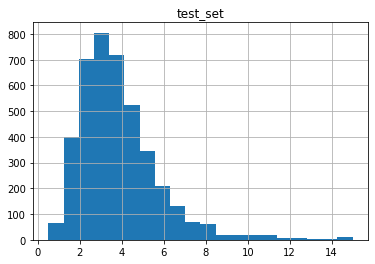

In [41]:
# clearly, Median_income is very important variable to the target median_house_value
# Let's zoom in Median_income to see how does it distribute in housing data 

%matplotlib inline
plt.title('housing')
housing['median_income'].hist(bins = 20)
plt.show()
plt.title('train_set')
train_set['median_income'].hist(bins = 20)
plt.show()
plt.title('test_set')
test_set['median_income'].hist(bins = 20)
plt.show()

In [48]:
# the distribution across the sets look consistence
# only visible issue- most of the median income falls between 2-5. Rest is very under represented



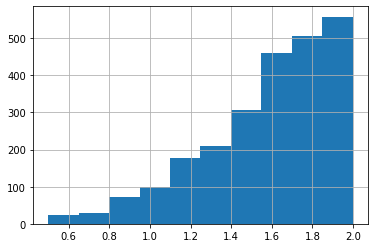

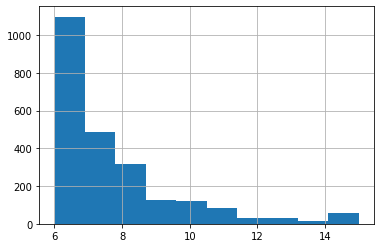

In [54]:
# let's zoom the trail 
%matplotlib inline
h=housing[housing['median_income'] < 2]
h['median_income'].hist(bins = 10)
plt.show()

h=housing[housing['median_income'] > 6]
h['median_income'].hist(bins = 10)
plt.show()

In [19]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [21]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        3921 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


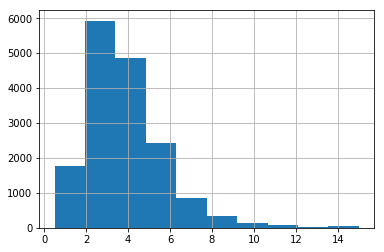

In [22]:
train_set['median_income'].hist(bins = 10)

In [27]:
import numpy as np
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] <5, 5.0, inplace = True)

In [29]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size =0.2, random_state = 42 )

In [35]:
for train_index, test_index  in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [38]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [39]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [40]:
train , test = train_test_split(housing, test_size = 0.2, random_state = 42)

In [42]:
train['income_cat'].value_counts()/len(train) 


3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64

In [44]:
for set in (strat_train_set,strat_test_set):
     set.drop('income_cat', axis = 1, inplace = True)

In [46]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [47]:
housing_train = strat_train_set.copy()

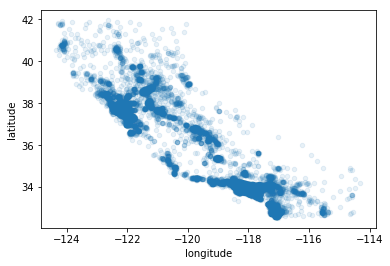

In [49]:
housing_train.plot(kind = 'scatter', x= 'longitude', y = 'latitude', alpha = 0.1)